In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

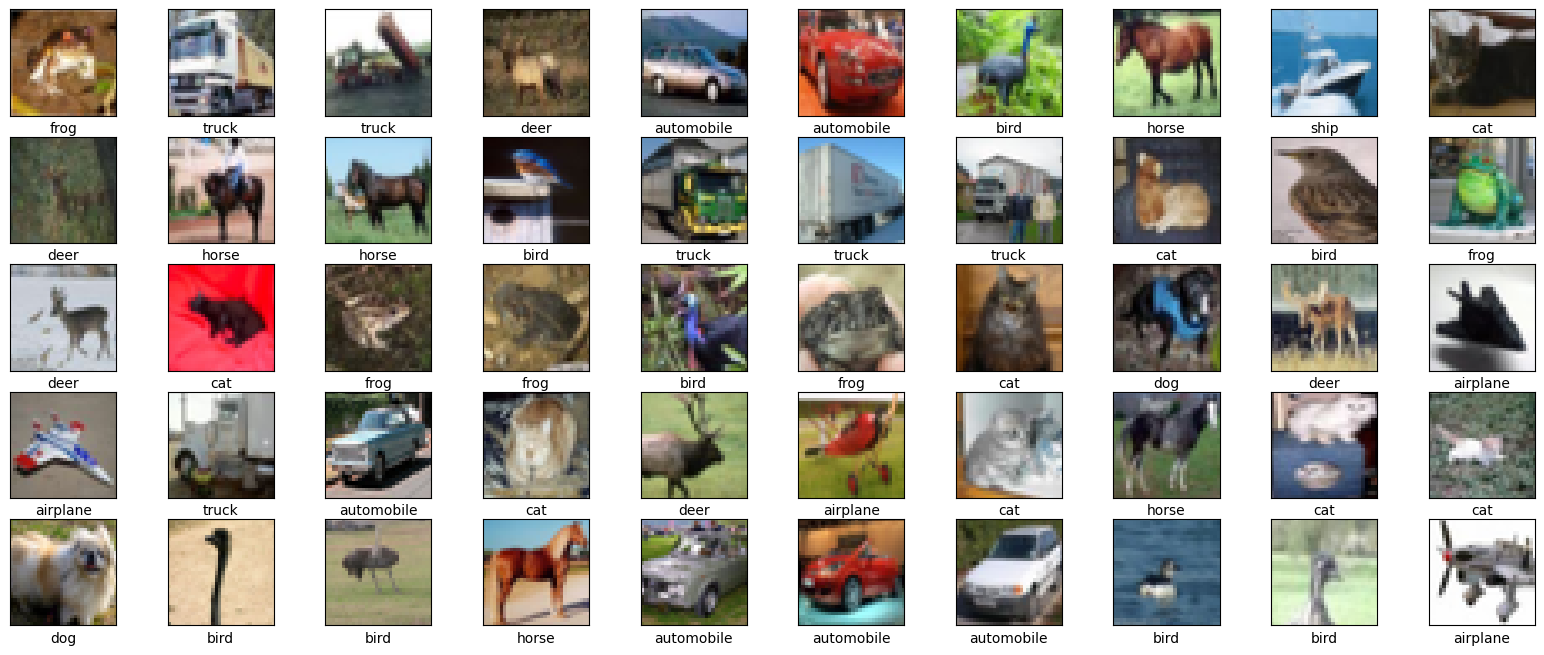

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [5]:
X_train_processed, X_test_processed = X_train / 255.0, X_test / 255.0

In [6]:
model = keras.Sequential()

# Convolutional Layers
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='valid', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 16)        2320      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 16)        2320      
                                                                 
 batch_normalization_2 (Batc  (None, 30, 30, 16)       6

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model_l1 = keras.Sequential()

# Convolutional Layers
model_l1.add(layers.Conv2D(16, (3, 3), activation='relu', padding='valid',kernel_regularizer=regularizers.l1(0.01), input_shape=(32, 32, 3)))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(16, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(16, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.MaxPooling2D((2, 2)))
model_l1.add(layers.Dropout(0.5))

model_l1.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.MaxPooling2D((2, 2)))
model_l1.add(layers.Dropout(0.5))

model_l1.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.MaxPooling2D((2, 2)))
model_l1.add(layers.Dropout(0.5))

# Fully Connected Layers
model_l1.add(layers.Flatten())
model_l1.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Dropout(0.5))
model_l1.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))

model_l1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 batch_normalization_9 (Batc  (None, 30, 30, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 16)        2320      
                                                                 
 batch_normalization_10 (Bat  (None, 30, 30, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 30, 30, 16)        2320      
                                                                 
 batch_normalization_11 (Bat  (None, 30, 30, 16)      

In [9]:
model_l1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model_l2 = keras.Sequential()

# Convolutional Layers
model_l2.add(layers.Conv2D(16, (3, 3), activation='relu', padding='valid',kernel_regularizer=regularizers.l2(0.01), input_shape=(32, 32, 3)))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(16, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(16, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Dropout(0.5))

model_l2.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Dropout(0.5))

model_l2.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Dropout(0.5))

# Fully Connected Layers
model_l2.add(layers.Flatten())
model_l2.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Dropout(0.5))
model_l2.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))

model_l2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 batch_normalization_18 (Bat  (None, 30, 30, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 30, 30, 16)        2320      
                                                                 
 batch_normalization_19 (Bat  (None, 30, 30, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 30, 30, 16)        2320      
                                                                 
 batch_normalization_20 (Bat  (None, 30, 30, 16)      

In [11]:
model_l2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
epochs = 20

In [13]:
model_processed = model
h = model.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 33s 16ms/step - loss: 2.1303 - accuracy: 0.2831 - val_loss: 1.6352 - val_accuracy: 0.4039
Epoch 2/20
625/625 [==============================] - 9s 14ms/step - loss: 1.6018 - accuracy: 0.4175 - val_loss: 1.3728 - val_accuracy: 0.5035
Epoch 3/20
625/625 [==============================] - 8s 13ms/step - loss: 1.3842 - accuracy: 0.4964 - val_loss: 1.2286 - val_accuracy: 0.5545
Epoch 4/20
625/625 [==============================] - 9s 14ms/step - loss: 1.2319 - accuracy: 0.5561 - val_loss: 1.5455 - val_accuracy: 0.4977
Epoch 5/20
625/625 [==============================] - 9s 15ms/step - loss: 1.1496 - accuracy: 0.5870 - val_loss: 1.3349 - val_accuracy: 0.5489
Epoch 6/20
625/625 [==============================] - 8s 13ms/step - loss: 1.0869 - accuracy: 0.6132 - val_loss: 1.0977 - val_accuracy: 0.6172
Epoch 7/20
625/625 [==============================] - 9s 14ms/step - loss: 1.0306 - accuracy: 0.6349 - val_loss: 1.1344 - val_accuracy: 0.605

In [14]:
h_processed = model_processed.fit(x=X_train_processed, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 11s 16ms/step - loss: 0.7531 - accuracy: 0.7390 - val_loss: 3.1632 - val_accuracy: 0.1164
Epoch 2/20
625/625 [==============================] - 8s 13ms/step - loss: 0.7420 - accuracy: 0.7430 - val_loss: 0.6938 - val_accuracy: 0.7615
Epoch 3/20
625/625 [==============================] - 8s 12ms/step - loss: 0.7281 - accuracy: 0.7481 - val_loss: 0.6399 - val_accuracy: 0.7770
Epoch 4/20
625/625 [==============================] - 8s 13ms/step - loss: 0.7098 - accuracy: 0.7546 - val_loss: 0.6520 - val_accuracy: 0.7738
Epoch 5/20
625/625 [==============================] - 8s 13ms/step - loss: 0.7086 - accuracy: 0.7550 - val_loss: 0.6426 - val_accuracy: 0.7771
Epoch 6/20
625/625 [==============================] - 8s 12ms/step - loss: 0.6982 - accuracy: 0.7578 - val_loss: 0.6434 - val_accuracy: 0.7791
Epoch 7/20
625/625 [==============================] - 8s 13ms/step - loss: 0.6927 - accuracy: 0.7615 - val_loss: 0.7862 - val_accuracy: 0.733

In [15]:
model_l1_processed = model_l1
h1 = model_l1.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 17s 14ms/step - loss: 21.4452 - accuracy: 0.2711 - val_loss: 4.9163 - val_accuracy: 0.1025
Epoch 2/20
625/625 [==============================] - 8s 12ms/step - loss: 3.6899 - accuracy: 0.3043 - val_loss: 3.5170 - val_accuracy: 0.2959
Epoch 3/20
625/625 [==============================] - 8s 14ms/step - loss: 3.3328 - accuracy: 0.3122 - val_loss: 4.8520 - val_accuracy: 0.2087
Epoch 4/20
625/625 [==============================] - 8s 13ms/step - loss: 3.2783 - accuracy: 0.3192 - val_loss: 3.3937 - val_accuracy: 0.2819
Epoch 5/20
625/625 [==============================] - 8s 12ms/step - loss: 3.3204 - accuracy: 0.3270 - val_loss: 3.2725 - val_accuracy: 0.3300
Epoch 6/20
625/625 [==============================] - 9s 15ms/step - loss: 3.1103 - accuracy: 0.3349 - val_loss: 3.0125 - val_accuracy: 0.3485
Epoch 7/20
625/625 [==============================] - 9s 15ms/step - loss: 3.0428 - accuracy: 0.3488 - val_loss: 3.3471 - val_accuracy: 0.28

In [16]:
h1_processed = model_l1_processed.fit(x=X_train_processed, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 12s 16ms/step - loss: 3.0166 - accuracy: 0.3880 - val_loss: 4.2647 - val_accuracy: 0.1199
Epoch 2/20
625/625 [==============================] - 10s 16ms/step - loss: 2.9882 - accuracy: 0.3940 - val_loss: 2.9074 - val_accuracy: 0.4195
Epoch 3/20
625/625 [==============================] - 10s 16ms/step - loss: 2.9329 - accuracy: 0.3940 - val_loss: 2.8455 - val_accuracy: 0.4312
Epoch 4/20
625/625 [==============================] - 9s 15ms/step - loss: 2.9393 - accuracy: 0.3963 - val_loss: 2.9903 - val_accuracy: 0.3749
Epoch 5/20
625/625 [==============================] - 9s 14ms/step - loss: 2.9498 - accuracy: 0.3991 - val_loss: 2.9596 - val_accuracy: 0.4084
Epoch 6/20
625/625 [==============================] - 10s 16ms/step - loss: 2.9335 - accuracy: 0.3967 - val_loss: 2.8409 - val_accuracy: 0.4452
Epoch 7/20
625/625 [==============================] - 10s 16ms/step - loss: 2.9075 - accuracy: 0.4011 - val_loss: 3.0905 - val_accuracy: 0

In [17]:
model_l2_processed = model_l2
h2 = model_l2.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 18s 15ms/step - loss: 5.6726 - accuracy: 0.2992 - val_loss: 3.6396 - val_accuracy: 0.3502
Epoch 2/20
625/625 [==============================] - 9s 14ms/step - loss: 2.6471 - accuracy: 0.4602 - val_loss: 2.7538 - val_accuracy: 0.3517
Epoch 3/20
625/625 [==============================] - 9s 14ms/step - loss: 1.9073 - accuracy: 0.5377 - val_loss: 1.8051 - val_accuracy: 0.5323
Epoch 4/20
625/625 [==============================] - 9s 14ms/step - loss: 1.6974 - accuracy: 0.5678 - val_loss: 1.6701 - val_accuracy: 0.5688
Epoch 5/20
625/625 [==============================] - 8s 14ms/step - loss: 1.6251 - accuracy: 0.5879 - val_loss: 1.6649 - val_accuracy: 0.5642
Epoch 6/20
625/625 [==============================] - 9s 14ms/step - loss: 1.5935 - accuracy: 0.6024 - val_loss: 1.6266 - val_accuracy: 0.5962
Epoch 7/20
625/625 [==============================] - 9s 15ms/step - loss: 1.5739 - accuracy: 0.6177 - val_loss: 1.5020 - val_accuracy: 0.641

In [18]:
h2_processed = model_l2_processed.fit(x=X_train_processed, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 12s 17ms/step - loss: 1.4702 - accuracy: 0.6573 - val_loss: 3.9275 - val_accuracy: 0.1341
Epoch 2/20
625/625 [==============================] - 10s 16ms/step - loss: 1.4470 - accuracy: 0.6628 - val_loss: 1.4287 - val_accuracy: 0.6642
Epoch 3/20
625/625 [==============================] - 9s 14ms/step - loss: 1.4543 - accuracy: 0.6625 - val_loss: 1.4733 - val_accuracy: 0.6534
Epoch 4/20
625/625 [==============================] - 10s 15ms/step - loss: 1.4412 - accuracy: 0.6635 - val_loss: 1.3310 - val_accuracy: 0.6998
Epoch 5/20
625/625 [==============================] - 10s 15ms/step - loss: 1.4378 - accuracy: 0.6667 - val_loss: 1.3203 - val_accuracy: 0.7048
Epoch 6/20
625/625 [==============================] - 10s 16ms/step - loss: 1.4410 - accuracy: 0.6634 - val_loss: 1.4351 - val_accuracy: 0.6712
Epoch 7/20
625/625 [==============================] - 9s 15ms/step - loss: 1.4230 - accuracy: 0.6696 - val_loss: 1.4289 - val_accuracy: 0

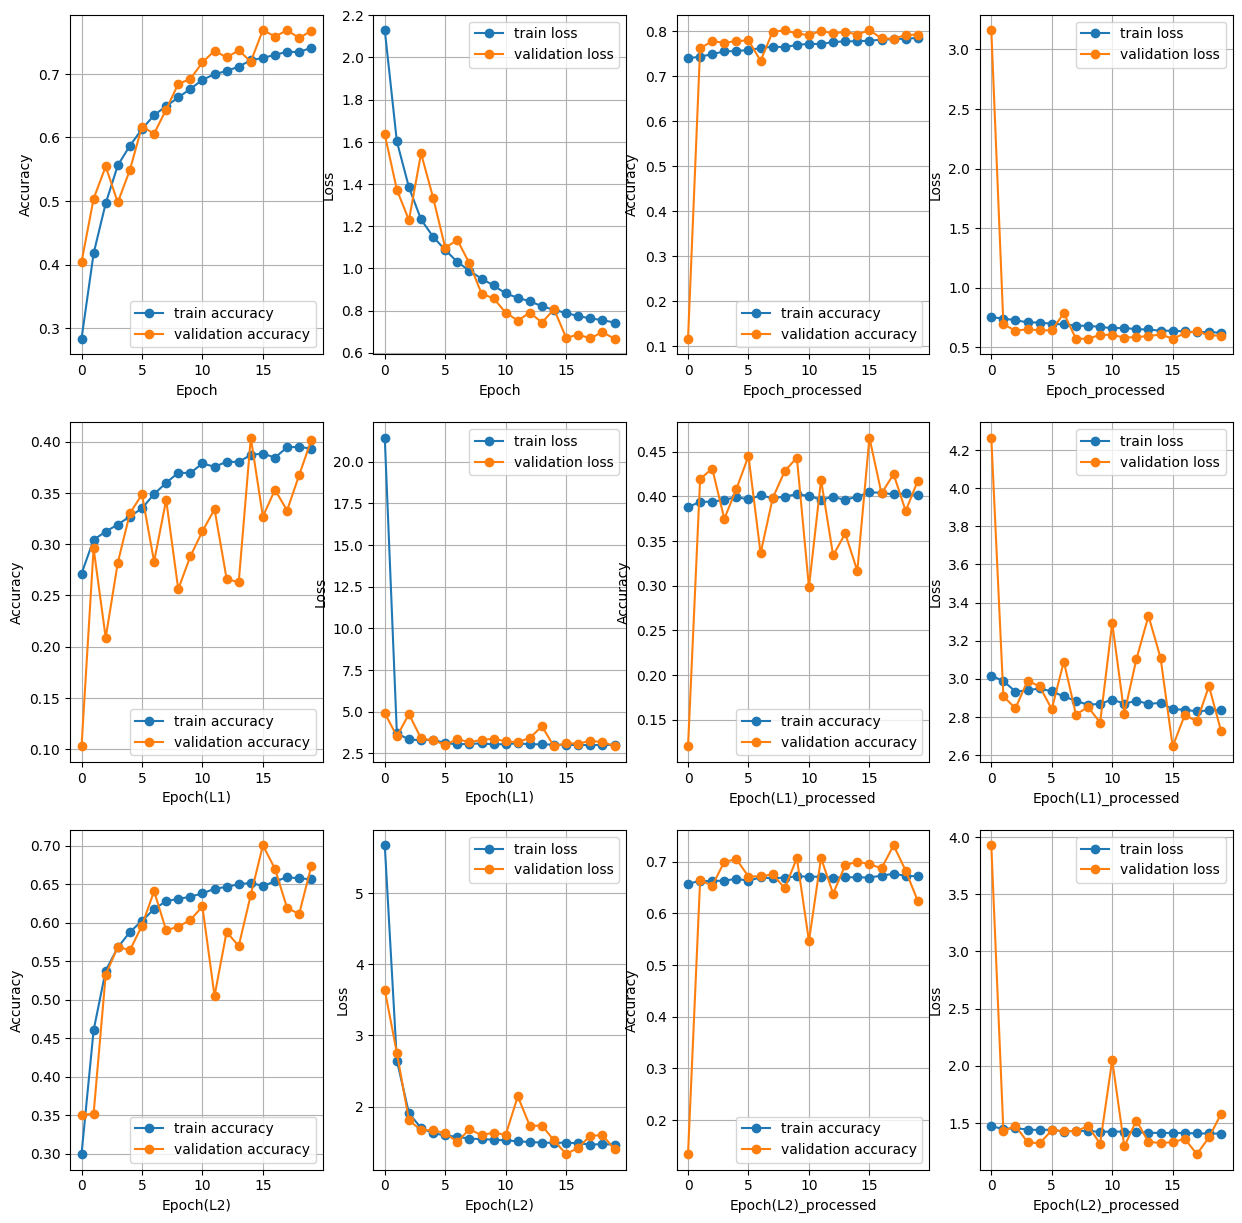

In [19]:
plt.figure(figsize=(15,15))

plt.subplot(3,4,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,3)
plt.plot(h_processed.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h_processed.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,4)
plt.plot(h_processed.history['loss'], 'o-', label='train loss')
plt.plot(h_processed.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,5)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L1)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,6)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L1)')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,7)
plt.plot(h1_processed.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1_processed.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L1)_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,8)
plt.plot(h1_processed.history['loss'], 'o-', label='train loss')
plt.plot(h1_processed.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L1)_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,9)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L2)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,10)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L2)')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,11)
plt.plot(h2_processed.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2_processed.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L2)_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,12)
plt.plot(h2_processed.history['loss'], 'o-', label='train loss')
plt.plot(h2_processed.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L2)_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [20]:
test_acc, test_loss = model.evaluate(X_test, Y_test)
test_acc_processed, test_loss_processed = model_processed.evaluate(X_test_processed, Y_test)
test_acc_l1, test_loss_l1 = model_l1.evaluate(X_test, Y_test)
test_acc_l1_processed, test_loss_l1_processed = model_l1_processed.evaluate(X_test_processed, Y_test)
test_acc_l2, test_loss_l2 = model_l2.evaluate(X_test, Y_test)
test_acc_l2_processed, test_loss_l2_processed = model_l2_processed.evaluate(X_test_processed, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.5987 - accuracy: 0.6162


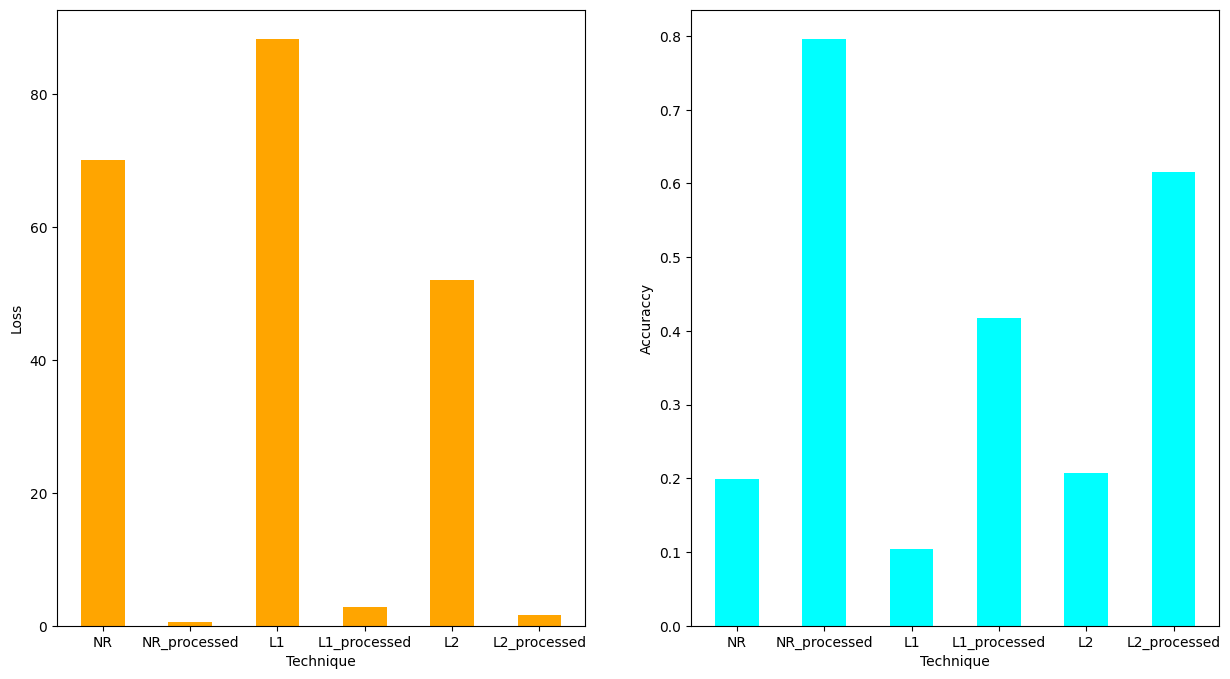

In [21]:
plt.figure(figsize=(15,8))

x = np.arange(6)
y1 = [test_loss, test_loss_processed, test_loss_l1, test_loss_l1_processed, test_loss_l2, test_loss_l2_processed]
y2 = [test_acc, test_acc_processed, test_acc_l1, test_acc_l1_processed, test_acc_l2, test_acc_l2_processed]
width = 0.5

# plot data in grouped manner of bar type
plt.subplot(1,2,1)
plt.bar(x, y2, width, color='orange')
plt.xticks(x, ['NR', 'NR_processed', 'L1', 'L1_processed', 'L2', 'L2_processed'])
plt.xlabel("Technique")
plt.ylabel("Loss")

# plot data in grouped manner of bar type
plt.subplot(1,2,2)
plt.bar(x, y1, width, color='cyan')
plt.xticks(x, ['NR', 'NR_processed', 'L1', 'L1_processed', 'L2', 'L2_processed'])
plt.xlabel("Technique")
plt.ylabel("Accuraccy")
plt.show()